# Example workflow

{class}`~pyrite.Ligand` is the backbone of {mod}`pyrite`. It allows you to load and manipulate molecules, visualize and save conformations, and create and optimize docking workflows. On this page, we will get to know the Ligand object, and learn how to effectively use it.

The {class}`~pyrite.Ligand` object is an extension of the rdkit {class}`~rdkit.Chem.rdchem.Mol` object. This means that any method that works on a Mol object also works on a Ligand object. For example, we can use the rdkit {meth}`~rdkit.Chem.rdchem.Mol.GetNumHeavyAtoms` method to retrieve the number of heavy atoms in our Ligand:

In [91]:
import sys
import os

bp = os.path.expanduser("~/Dev/bp")
sys.path.append(bp)
from pyrite import *
from rdkit import Chem
import numpy as np

In [92]:
ligand = Ligand.from_smiles("CCCO")
ligand.GetNumHeavyAtoms()

4

In [93]:
ligand.set_draw_options({'size': (240, 180)})

## Creating Ligands

Coming soon...

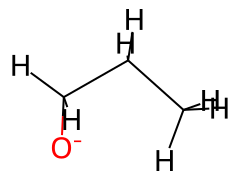

In [94]:
ligand.svg

## Manipulating Ligands

Another crucial property of {class}`Ligand` is the ability to easily change the conformation, rotation and position of the ligand. There is immediately an important distinction to make here. Every ligand has a default conformer. This is the conformation that was used in the initial creation of the ligand. When the ligand is manipulated without specifying a `conformer id`, this is the conformer that is changed. This simplifies the code needed:

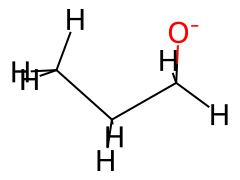

In [95]:
ligand.transform(np.pi, np.pi, 0, 0, 0, 0)
ligand.svg

However, this method of manipulation removes a lot of our flexibility. For example, it is now no longer possible to create a multithreaded program using one ligand, as we are working based on side-effects now.

To solve this issue, we can specify a `conformer id` as an argument to most methods. This will make the method act only on that `conformer id`:

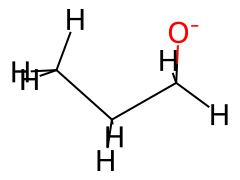

In [96]:
conf_id = ligand.AddConformer(ligand.GetConformer(), assignId=True)
ligand.transform(np.pi, np.pi, 0, 0, 0, 0, conf_id)
ligand.svg

It is important to remove the conformer when it is not needed anymore, especially when creating conformers often. The memory footprint of a single conformer is not that big, but when running a docking workflow for example, hundreds of thousands of conformers can be created, quickly grinding the program to a halt as your RAM fills up.

In [ ]:
ligand.RemoveConformer(conf_id)

A Ligand can be manipulated in three ways: by translation and rotation, and by modifying the dihedral angles within the molecule. As shown above, the {meth}`~pyrite.Ligand.transform` method is used when modifying the rotation and translation of the molecule. For modification of the dihedral angles, the {meth}`~pyrite.Ligand.set_dihedral_angles` method can be used:

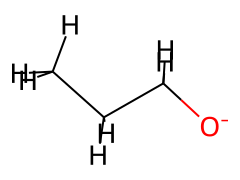

In [97]:
ligand.set_dihedral_angles([np.pi])
ligand.svg

When working with entire poses, often denoted as `v` in pyrite, the {meth}`~pyrite.Ligand.update` method can be used as a shortcut, to set the entire pose in one go:

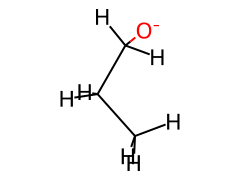

In [98]:
#  roll, pitch, yaw, x, y, z, dihedral_0
v = [0, np.pi, np.pi / 2, 0, 0, 0, np.pi / 2]
ligand.update(v)
ligand.svg

## Visualizing Ligands

Coming soon...

In [ ]:
ligand.viewer

## Saving Ligands

Coming soon...